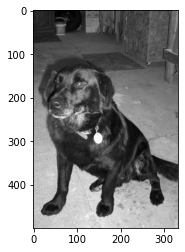

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/Users/test/Desktop/AI Projects/Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show
        break
    break

In [26]:
print(img_array.shape)

(500, 333)


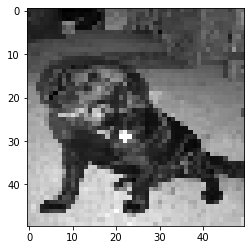

In [27]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [28]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
        
        
        
create_training_data()
        
        

In [29]:
print(len(training_data))

24946


In [30]:
import random

random.shuffle(training_data)

In [31]:
for sample in training_data[:10]:
    print(sample[1]) #check if labels correct

0
1
0
0
0
0
1
1
0
1


In [32]:
x = [] #Feature set
y = [] #labels

In [33]:
for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
y = np.array(y)

In [34]:
import pickle

#save data
pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [35]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

In [36]:
x[1]

array([[[ 30],
        [ 26],
        [ 26],
        ...,
        [ 21],
        [ 19],
        [ 18]],

       [[ 36],
        [ 33],
        [ 34],
        ...,
        [ 24],
        [ 22],
        [ 21]],

       [[ 38],
        [ 37],
        [ 40],
        ...,
        [ 18],
        [ 20],
        [ 18]],

       ...,

       [[150],
        [137],
        [128],
        ...,
        [ 45],
        [ 43],
        [ 42]],

       [[149],
        [128],
        [125],
        ...,
        [ 53],
        [ 52],
        [ 47]],

       [[157],
        [140],
        [127],
        ...,
        [ 58],
        [ 55],
        [ 49]]], dtype=uint8)